# Применение  иерархической кластеризации и KMeans на плоских данных

$\textbf{Постановка задачи:}$
рассмотреть применимость и эффективность методов иерархической кластеризации и KMeans на плоских данных

$\textbf{Используемые инструменты:}$
библиотеки numpy, matplotlib, sklearn

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn  import datasets
from time import time
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

$\textbf{Функция иерархической кластеризации:}$

In [25]:
def hierarchical(data):
    t_start = time()
    Z = linkage(data, 'ward')
    clusters = fcluster(Z, t=13, depth=10)
    print("Time:%s" % (time()-t_start))
    K = max(clusters) - min(clusters) + 1
    print("Количество кластеров", K)
    for i in range(min(clusters), max(clusters) + 1):
            plt.scatter(x=data.T[0][clusters == i], y=data.T[1][clusters == i])
    plt.show()
    return K

$\textbf{Функция KMeans:}$

In [3]:
def kmeans(data, n):
    t_start = time()
    k_means = KMeans(n_clusters=n).fit(data)
    clusterization = k_means.predict(data)
    print("Time:%s" % (time()-t_start))
    for i in range(min(clusterization), max(clusterization) + 1):
        plt.scatter(x=data.T[0][clusterization == i], y=data.T[1][clusterization == i])

$\textbf{Используемые данные:}$

Неперсикающиеся равномерно заполненные квадраты (пересикающиеся рассматривать не имеет смысла, т.к. из-за равномерности их заполнения они сольются в один кластер):

In [4]:
def nearby_set(depth=10, mindots=60, maxdots=300, factor = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(depth**0.5)):
        for j in range(0, int(depth**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*factor + i, np.random.ranf(count)*factor + j]).T
            y = np.array([int(depth**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, depth - int(depth**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*factor + int(depth**0.5), np.random.ranf(count)*factor + i]).T
        y = np.array([int(depth**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data

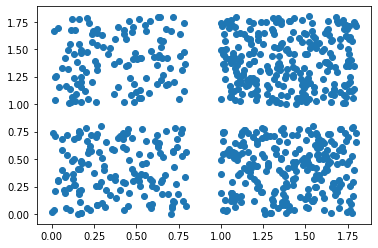

In [5]:
X_1= nearby_set(depth=4, factor = 0.8)
plt.scatter(X_1.T[0], X_1.T[1])
plt.show()

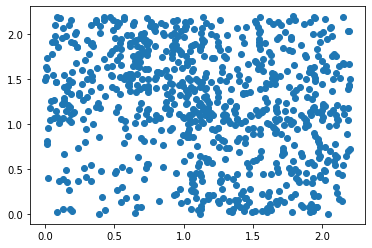

In [26]:
X_2= nearby_set(depth=4, factor = 1.2)
plt.scatter(X_2.T[0], X_2.T[1])
plt.show()

Непересикающиеся и пересикающиеся эллипсы с убывающей от центра вероятностью

In [8]:
def blobs_set(mindots=800, maxdots=1600, factor=0.2):
    X_data = datasets.make_blobs(n_samples=np.random.randint(mindots, maxdots), cluster_std=factor, center_box=(-1, 1))[0]
    Z = linkage(X_data, 'ward')
    return X_data

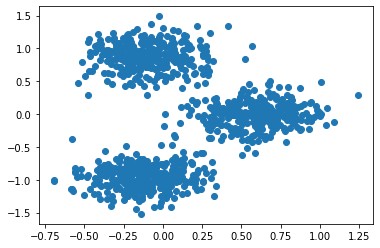

In [9]:
X_3 = blobs_set(factor=0.2)
plt.scatter(X_3.T[0], X_3.T[1])
plt.show()

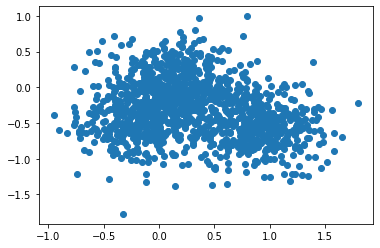

In [19]:
X_4 = blobs_set(factor=0.3)
plt.scatter(X_4.T[0], X_4.T[1])
plt.show()

$\textbf{Теперь рассмотрим применение иерархической кластеризации на этих данных, а затем с полученным количеством кластеров рассмотрим KMeans}$

Для непересикающихся квадратов:

Иерархическая кластеризация:

Time:0.025411128997802734
Количество кластеров 4


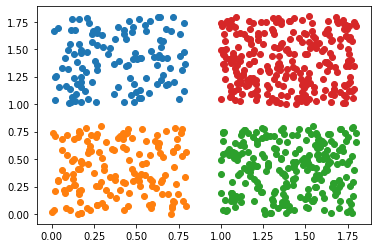

In [20]:
K_1 = hierarchical(X_1)

KMeans:

Time:0.10845613479614258


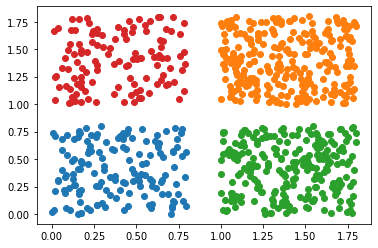

In [21]:
kmeans(X_1, K_1)

В данном случае иерархическая кластеризация хорошо различает кластеры, поэтому KMeans по точности не даёт преимущетсва. По скорости иерархическая кластеризация также оказывается лучше. Проблем с определением количества кластеров также не наблюдается.



Для пересикающихся квадратов:

Иерархическая кластеризация:

Time:0.028252840042114258
Количество кластеров 3


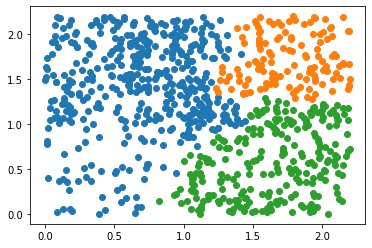

In [27]:
K_2 = hierarchical(X_2)

KMeans:

Time:0.08363699913024902


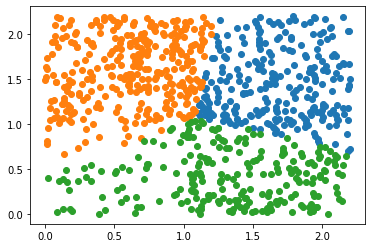

In [28]:
kmeans(X_2, K_2)

Здесь также имеет смысл посмотреть на работу KMeans при изначальном количестве кластеров, а не полученом в результате работы иерархической кластеризации:

Time:0.10921025276184082


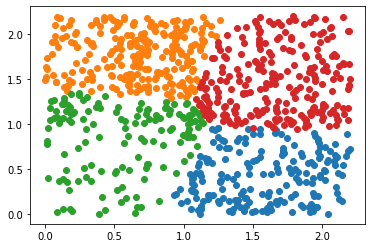

In [29]:
kmeans(X_2, 4)

Если посмотерть на график без окраски на кластеры, то видно, что трудно что-либо сказать про осмысленное разделение на кластеры. Можно заметить разве что некоторые уплотнения около X = 1 и Y = 1.25. Любой из данных результатов считаю осмысленным считать приемлимым. Разделение с помощью KMeans на 4 кластера выглядит более близким к изначальному, но взгялнув на сами данные трудно сказать, где там 4 кластера, так что этот фактор также считаю мало имеющим значение. По скорости работы иерархическая кластеризация опять опережает KMeans.

На непересикабщихся эллипсах:

Иерархическая кластеризация:

Time:0.026181697845458984
Количество кластеров 3


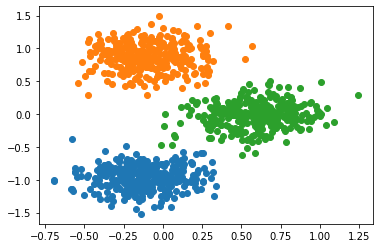

In [30]:
K_3 = hierarchical(X_3)

KMeans:

Time:0.04508328437805176


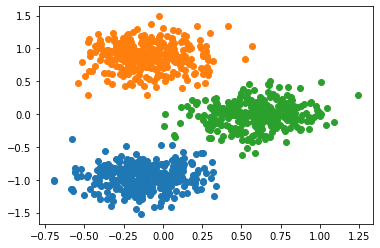

In [31]:
kmeans(X_3, K_3)

Оба алгоритам хорошо себя показали на таких данных. Количество кластеров и сами кластеры определены корректно. KMeans немного проигрывает в скорости, но не так значительно, как в предыдущих случаях.

На пересикающихся эллипсах:

Time:0.05523419380187988
Количество кластеров 5


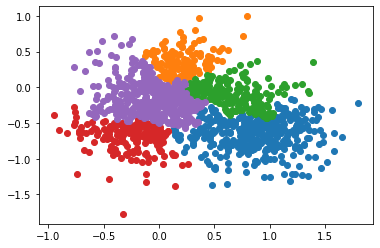

In [32]:
K_4 = hierarchical(X_4)

Time:0.09095120429992676


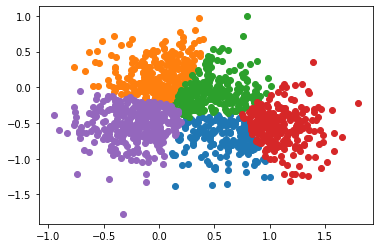

In [33]:
kmeans(X_4, K_4)

Здесь также имеет смысл посмотреть на работу KMeans при изначальном количестве кластеров, а не полученом в результате работы иерархической кластеризации:

Time:0.0559844970703125


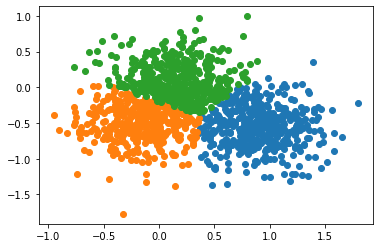

In [34]:
kmeans(X_4, 3)

На данном примере наконец можно увидеть, почему автоматическое определение количества кластеров с помощью иерархической кластеризации не стоит испольховать. Методы определения обладают довольно низкой точностью и в итоге зачастую могут приводить к подобным результатам. Стоит заметить, что при количестве кластеров равном пяти разделения методов иерархичесокой кластеризации и KMeans довольно существенно различатся визуально. Также при 3 кластерах KMeans показывает очень хороший результат, который мы бы изначально и хотели бы получить.

$\textbf{Вывод:}$ на рассмотренных данных при верном количестве кластеров KMeans каждый раз выдавал хороший результат, хоть и не на столько быстро, как иерахическая кластеризация. С другой стороны как можно увидеть на примере четвёртого теста автоматическое определение количества кластеров иерархической кластеризацией работает не всегда корректно и не является надёжным методом. По рещультатам данных тестов хотелось бы сделать вывод о том, что рассмотренных данных KMeans является более применимым, однако для этого нужно ещё рассмотреть случай иерархической кластеризации с заданным количеством кластеров, что находится вне рамок этого задания.